In [ ]:
import numpy as np
import scipy.stats as ss

**Задача 1**

In [ ]:
table = {(0, 0, 0): 0,
 (0, 0, 1): 0,
 (0, 0, 2): 0,
 (0, 0, 3): 0,
 (0, 0, 5): 0,
 (0, 0, 6): 2,
 (0, 0, 7): 0,
 (0, 1, 1): 0,
 (0, 1, 2): 0,
 (0, 1, 3): 0,
 (0, 1, 5): 0,
 (0, 1, 6): 2,
 (0, 1, 7): 0,
 (0, 2, 2): 0,
 (0, 2, 3): 0,
 (0, 2, 5): 0,
 (0, 2, 6): 2,
 (0, 2, 7): 0,
 (0, 3, 3): 0,
 (0, 3, 5): 0,
 (0, 3, 6): 2,
 (0, 3, 7): 0,
 (0, 5, 5): 0,
 (0, 5, 6): 10,
 (0, 5, 7): 0,
 (0, 6, 6): 5,
 (0, 6, 7): 2,
 (0, 7, 7): 0,
 (1, 1, 1): 10,
 (1, 1, 2): 5,
 (1, 1, 3): 5,
 (1, 1, 5): 20,
 (1, 1, 6): 2,
 (1, 1, 7): 0,
 (1, 2, 2): 5,
 (1, 2, 3): 5,
 (1, 2, 5): 10,
 (1, 2, 6): 2,
 (1, 2, 7): 0,
 (1, 3, 3): 5,
 (1, 3, 5): 10,
 (1, 3, 6): 2,
 (1, 3, 7): 0,
 (1, 5, 5): 40,
 (1, 5, 6): 10,
 (1, 5, 7): 0,
 (1, 6, 6): 5,
 (1, 6, 7): 2,
 (1, 7, 7): 0,
 (2, 2, 2): 25,
 (2, 2, 3): 5,
 (2, 2, 5): 50,
 (2, 2, 6): 2,
 (2, 2, 7): 0,
 (2, 3, 3): 5,
 (2, 3, 5): 10,
 (2, 3, 6): 2,
 (2, 3, 7): 0,
 (2, 5, 5): 100,
 (2, 5, 6): 10,
 (2, 5, 7): 0,
 (2, 6, 6): 5,
 (2, 6, 7): 2,
 (2, 7, 7): 0,
 (3, 3, 3): 40,
 (3, 3, 5): 80,
 (3, 3, 6): 2,
 (3, 3, 7): 0,
 (3, 5, 5): 160,
 (3, 5, 6): 10,
 (3, 5, 7): 0,
 (3, 6, 6): 5,
 (3, 6, 7): 2,
 (3, 7, 7): 0,
 (5, 5, 5): 1000,
 (5, 5, 6): 40,
 (5, 5, 7): 320,
 (5, 6, 6): 20,
 (5, 6, 7): 10,
 (5, 7, 7): 160,
 (6, 6, 6): 10,
 (6, 6, 7): 5,
 (6, 7, 7): 2,
 (7, 7, 7): 80}

def prize(x):
  return table[tuple(sorted(x))]


n = 1000000
samples = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32])).rvs(size = (n, 3), random_state = 42)
sample = np.array([prize(bet) for bet in samples])
sample.mean()


0.854844

**Задача 2**

In [ ]:
rv = { 0: 1/2, 1: 1/4, 2: 1/8, 3: 1/16, 5: 1/64, 6: 1/64, 7: 1/32}
def prob(a, b, c):
  if a != b and a != c and b != c:
    k = 6
  elif a == b == c:
    k = 1
  else:
    k = 3
  return rv[a] * rv[b] * rv[c] * k

E = 0
for a,b,c in table.keys():
  E += table[(a,b,c)] * prob(a,b,c)
# E = 0.856719970703125

n = 100000
samples = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32])).rvs(size = (n , 138, 3), random_state = 7)
mse = np.array([ (np.array([prize(bet) for bet in sample_]).mean() - E)**2 for sample_ in samples])
np.sqrt(mse.mean())


0.3682866888248611

Вообще есть ещё такое решение:

In [ ]:
n = 100000000
samples = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32])).rvs(size = (n, 3), random_state = 42)
sample_ = np.array([prize(bet) for bet in samples])
s_ = sample_.std()
s_/np.sqrt(138)

0.3684935844330724

**Задача 3**

In [ ]:
def prob_(a, b, c, dist):
  if a != b and a != c and b != c:
    k = 6
  elif a == b == c:
    k = 1
  else:
    k = 3
  return dist[a] * dist[b] * dist[c] * k


def gmean(sample):
  dist = dict()
  for val in [0,1,2,3,5,6,7]:
    dist[val] = (sample == val).mean()
  E_ = 0
  for a,b,c in table.keys():
    E_ += table[(a,b,c)] * prob_(a,b,c, dist)
  return E_

E = 0.856719970703125

n = 100000
samples = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32])).rvs(size = (n, 138 * 3), random_state = 42)
mse = np.array([(gmean(sample) - E)**2 for sample in samples])

np.sqrt(mse.mean())


0.1447580161060926

**Задача 4**

In [ ]:
n = 10000
samples = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32])).rvs(size = (n, 138, 3), random_state = 42)
cnt_2 = 0
cnt_1 = 0
for sample_ in samples:
  sample = np.array([prize(bet) for bet in sample_])
  if E > sample.mean() + 2*sample.std()/np.sqrt(138):
    cnt_2 += 1
  if E < sample.mean() - 2*sample.std()/np.sqrt(138):
    cnt_1 += 1
(cnt_1/n, cnt_2/n)


(0.001, 0.1304)

**Задача 5**

Пусть $X_{[n]}$  — выборка из распределения $U([0, \theta])$. Рассмотрим $X_{(n)}$ как оценку $\theta$.

**1.**Найдите смещение оценки. Является ли она асимптотически несмещенной?

**2.**Найдите дисперсию оценки. Является ли она состоятельной?

**3.**Изготовьте из $X_{(n)}$ несмещенную оценку $\theta$. Является ли она асимптотически нормальной?

Пусть $ \hat{\theta_n} :X_{(n)}$


**1** -
$b(\hat{\theta_n }) = E(\hat{\theta_n}) - \theta$

$$
E(\hat{\theta_n}) = \frac{1}{\theta^n}\int_{[0,\theta]^n} max(x_1, \dots, x_n) dx_1dx_2\dots dx_n = \frac{1}{\theta^n}\sum_1^n \int_{[0,\theta]}(\int_{[o,x_i]^{n -1}}x_{i}dx_1 \dots dx_{i-1}dx_{i+1}\dots dx_n) dx_i = \frac{1}{\theta^n} \sum_1^n \int_{[0,\theta]} x_i x_i^{n -1} dx_i = \frac{n}{\theta^n}\frac{\theta^{n + 1}}{n + 1} = \frac{n}{n + 1}\theta
$$
Значит 
$$
b(\hat{\theta_n }) = \frac{n}{n + 1}\theta - \theta = -\frac{1}{n + 1}\theta \rightarrow_{n \rightarrow \infty} 0
$$
Оценка является асимптотически несмещенной.

**2** - $D(\hat{\theta_n}) - ?$

$$
D(\hat{\theta_n}) = E(\hat{\theta_n}^2) - (E(\hat{\theta_n}))^2
$$
$$
E(\hat{\theta_n}^2) = \frac{1}{\theta^n}\int_{[0,\theta]^n} max(x_1, \dots, x_n)^2 dx_1dx_2\dots dx_n = \frac{1}{\theta^n}\sum_1^n \int_{[0,\theta]}(\int_{[o,x_i]^{n -1}}x_{i}^2dx_1 \dots dx_{i-1}dx_{i+1}\dots dx_n) dx_i = \frac{1}{\theta^n} \sum_1^n \int_{[0,\theta]} x_i^2 x_i^{n -1} dx_i = \frac{n}{\theta^n}\frac{\theta^{n+2}}{n + 2} = \frac{n}{n + 2}\theta^2
$$
$$
D(\hat{\theta_n}) = \frac{n}{n + 2}\theta^2 - (\frac{n}{n + 1}\theta)^2 = \theta^2\frac{n}{(n + 2)(n + 1)^2}
$$

Есть ли состоятельность: $\hat{\theta_n} \rightarrow^{\mathbb{P}} \theta$ ?
$$
MSE(\hat{\theta_n}) = E(\hat{\theta_n} - \theta)^2 = D(\hat{\theta_n}) + b^2(\hat{\theta_n})
$$
$$
MSE(\hat{\theta_n}) = \theta^2\frac{n}{(n + 2)(n + 1)^2} + \theta^2\frac{1}{(n+1)^2} = \theta^2\frac{2}{(n+2)(n+1)} →_{n → ∞} 0
$$
Следовательно, $\hat{\theta_n} →^{L_2} \theta $, а значит и $\hat{\theta_n} \rightarrow^{\mathbb{P}} \theta$, т.е. оценка является состоятельной.

**3** - несмещенная оценка $\tilde{\theta_n} := \frac{n+1}{n}\hat{\theta_n}$
Есть ли асимптотическая нормальность? т.е.
$$
\sqrt{n}(\tilde{\theta_n} - \theta) ⇒ N(0,σ^2)
$$
Ответ: Да (с $\sigma = 0$)

Давайте докажем, что $\sqrt{n}(\tilde{\theta_n} - \theta) \rightarrow^{\mathbb{P}} 0$ т.е.
$$
∀ϵ>0:  \mathbb{P}(|\sqrt{n}(\tilde{\theta_n} - \theta)| \geq ϵ) → 0
$$
$$
\mathbb{P}(|\sqrt{n}(\tilde{\theta_n} - \theta)| \geq ϵ) = \mathbb{P}(n(\tilde{\theta_n} - \theta)^2 \geq ϵ^2) \leq \frac{nE(\tilde{\theta_n} - \theta)^2}{ϵ^2} = \frac{nMSE(\tilde{\theta_n})}{ϵ^2} = \frac{n(D(\tilde{\theta_n}) + b^2(\tilde{\theta_n}))}{ϵ^2} = \frac{nD(\tilde{\theta_n})}{ϵ^2} = (\frac{n + 1}{n})^2\frac{nD(\hat{\theta_n})}{ϵ^2} = \theta^2\frac{n^2}{(n + 2)(n + 1)^2} (\frac{n + 1}{nϵ})^2 = \frac{\theta^2}{ϵ^2} \frac{1}{(n + 2)} → 0
$$
Следовательно, $\sqrt{n}(\tilde{\theta_n} - \theta) \Rightarrow δ_0$ ~ $N(0,0)$.

In [ ]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

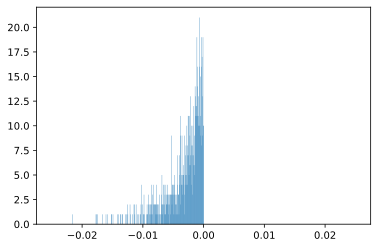

In [ ]:
import random as rd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


n = 100000
m = 1000

samples = np.array([[rd.random() for i in range(n)] for j in range(m)])
points = [np.sqrt(n)*(((n+1)/n) * (max(sample) - 1)) for sample in samples]
bins = np.linspace(-0.025, 0.025, 1000)
plt.hist(points, bins)